# Financial Portfolios, Modern Portfolio Theory & Asset Pricing

## Getting the Data

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
#stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     #start = "2014-01-01", end = "2018-12-31")

In [3]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [4]:
stocks.head()

Adj Close                                                \
                 AMZN          BA        DIS         IBM         KO   
Date                                                                  
2013-12-31  19.939501  116.654137  70.312157  123.706306  31.023643   
2014-01-02  19.898500  116.807953  70.192520  122.360901  30.535500   
2014-01-03  19.822001  117.619881  70.045250  123.092934  30.385298   
2014-01-06  19.681499  118.295082  69.778374  122.670860  30.242615   
2014-01-07  19.901501  120.089882  70.256927  125.117706  30.332727   

                           Close                                     ...  \
                 MSFT       AMZN          BA        DIS         IBM  ...   
Date                                                                 ...   
2013-12-31  31.780657  19.939501  136.490005  76.400002  179.321228  ...   
2014-01-02  31.568283  19.898500  136.669998  76.269997  177.370941  ...   
2014-01-03  31.355892  19.822001  137.619995  76.110001  178.432129  ...   
2014-01-06  30.693264  19.681499  138.410004  75.820000  177.820267  ...   
2014-01-07  30.931139  19.901501  140.509995  76.339996  181.367111  ...   

                 Open                                      Volume           \
                  DIS         IBM         KO       MSFT      AMZN       BA   
Date                                                                         
2013-12-31  76.279999  178.288712  41.130001  37.400002  39930000  2096000   
2014-01-02  76.040001  178.977051  41.119999  37.349998  42756000  3366700   
2014-01-03  76.300003  177.657745  40.680000  37.200001  44204000  3177400   
2014-01-06  76.529999  178.919693  40.480000  36.849998  63412000  4196500   
2014-01-07  76.120003  178.193115  40.480000  36.330002  38320000  4238500   

                                                  
                DIS      IBM        KO      MSFT  
Date                                              
2013-12-31  4692300  3786206  11729200  17503500  
2014-01-02  5200900  4755639  12698600  30632200  
2014-01-03  4060700  4250107  10403400  31134800  
2014-01-06  6816200  4254919  11036300  43603700  
2014-01-07  4494900  6205186  11872300  35802800  

[5 rows x 36 columns]

In [5]:
stocks.tail()

Adj Close                                                \
                 AMZN          BA         DIS        IBM         KO   
Date                                                                  
2018-12-21  68.872498  295.930267  102.961685  87.231064  41.978771   
2018-12-24  67.197998  285.834351   99.138412  84.581261  40.557999   
2018-12-26  73.544998  305.044769  104.552246  87.584908  41.422810   
2018-12-27  73.082001  308.163940  105.233910  89.464119  41.943462   
2018-12-28  73.901001  307.425446  106.004501  88.874413  41.652256   

                           Close                                      ...  \
                 MSFT       AMZN          BA         DIS         IBM  ...   
Date                                                                  ...   
2018-12-21  94.106026  68.872498  304.549988  104.220001  106.061188  ...   
2018-12-24  90.178154  67.197998  294.160004  100.349998  102.839386  ...   
2018-12-26  96.338203  73.544998  313.929993  105.830002  106.491394  ...   
2018-12-27  96.932190  73.082001  317.140015  106.519997  108.776291  ...   
2018-12-28  96.175354  73.901001  316.380005  107.300003  108.059273  ...   

                  Open                                        Volume           \
                   DIS         IBM         KO        MSFT       AMZN       BA   
Date                                                                            
2018-12-21  106.470001  107.552582  47.259998  101.629997  272806000  7641700   
2018-12-24  103.230003  105.066925  47.619999   97.680000  144400000  3435300   
2018-12-26  100.489998  103.250481  45.880001   95.139999  208236000  4843400   
2018-12-27  104.410004  105.152962  46.740002   99.300003  194440000  4341100   
2018-12-28  107.279999  109.196938  47.889999  102.089996  176580000  3725200   

                                                     
                 DIS       IBM        KO       MSFT  
Date                                                 
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[5 rows x 36 columns]

In [6]:
stocks = stocks["Adj Close"].copy()

In [7]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,19.939501,116.654137,70.312157,123.706306,31.023643,31.780657
2014-01-02,19.898500,116.807953,70.192520,122.360901,30.535500,31.568283
2014-01-03,19.822001,117.619881,70.045250,123.092934,30.385298,31.355892
2014-01-06,19.681499,118.295082,69.778374,122.670860,30.242615,30.693264
2014-01-07,19.901501,120.089882,70.256927,125.117706,30.332727,30.931139


In [8]:
stocks.to_csv("port_stocks.csv")

## Creating the equal-weighted Portfolio

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [10]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [11]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,19.9395,116.6541,70.3122,123.7063,31.0236,31.7807
2014-01-02,19.8985,116.8080,70.1925,122.3609,30.5355,31.5683
2014-01-03,19.8220,117.6199,70.0452,123.0929,30.3853,31.3559
2014-01-06,19.6815,118.2951,69.7784,122.6709,30.2426,30.6933
2014-01-07,19.9015,120.0899,70.2569,125.1177,30.3327,30.9311


In [12]:
ret = stocks.pct_change().dropna()

In [13]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179


In [14]:
ret.mean(axis = 1)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [15]:
no_assets = len(stocks.columns)
no_assets

6

In [16]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [18]:
ret.dot(weights)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [19]:
ret["EWP"] = ret.dot(weights)

In [20]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067,-0.0060
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0008
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078,0.0106
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068


In [21]:
summary = ret.agg(["mean", "std"]).T

In [22]:
summary

,mean,std
AMZN,0.0012,0.0195
BA,0.0009,0.0147
DIS,0.0004,0.0119
IBM,-0.0002,0.0126
KO,0.0003,0.0086
MSFT,0.0010,0.0146
EWP,0.0006,0.0095


In [23]:
summary.columns = ["Return", "Risk"]

In [24]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [25]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2215,0.2329
DIS,0.1002,0.1887
IBM,-0.0463,0.1992
KO,0.0685,0.1369
MSFT,0.2488,0.2317
EWP,0.1505,0.1514


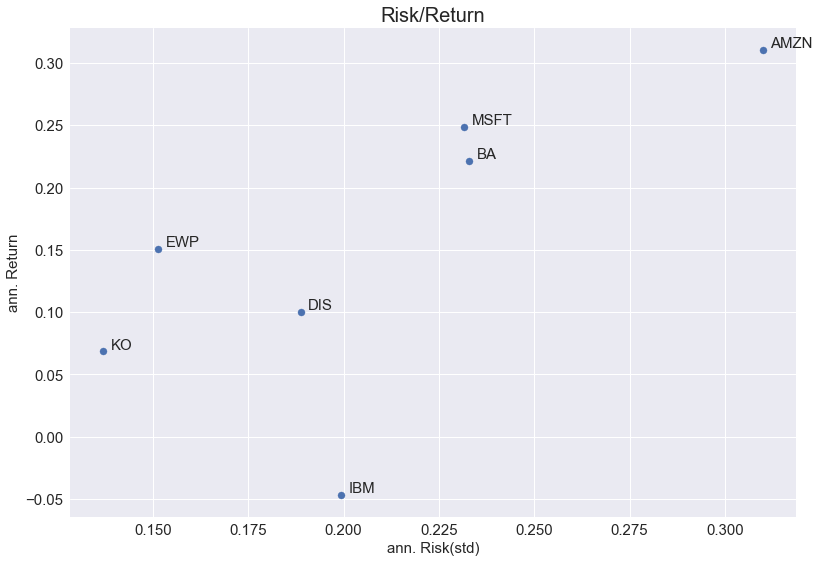

In [26]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [27]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

## Creating many Random Portfolios

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [29]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [30]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,19.9395,116.6541,70.3122,123.7063,31.0236,31.7807
2014-01-02,19.8985,116.8080,70.1925,122.3609,30.5355,31.5683
2014-01-03,19.8220,117.6199,70.0452,123.0929,30.3853,31.3559
2014-01-06,19.6815,118.2951,69.7784,122.6709,30.2426,30.6933
2014-01-07,19.9015,120.0899,70.2569,125.1177,30.3327,30.9311


In [31]:
ret = stocks.pct_change().dropna()
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179


In [32]:
summary = ann_risk_return(ret)

In [33]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2215,0.2329
DIS,0.1002,0.1887
IBM,-0.0463,0.1992
KO,0.0685,0.1369
MSFT,0.2488,0.2317


In [34]:
noa = len(stocks.columns)
noa

6

In [35]:
nop = 100000
nop

100000

In [36]:
np.random.random(10*6).reshape(10,6)

array([[0.93900973, 0.51715372, 0.68742667, 0.27120828, 0.37616036,
        0.50747645],
       [0.00251017, 0.44933407, 0.84999853, 0.62680236, 0.67968116,
        0.39479111],
       [0.57006118, 0.0546448 , 0.34139537, 0.55637049, 0.60350896,
        0.25192011],
       [0.58243436, 0.63450331, 0.09873642, 0.45767928, 0.00884263,
        0.28467198],
       [0.4155834 , 0.44812795, 0.61034054, 0.12209736, 0.40116   ,
        0.07986691],
       [0.70478733, 0.98161705, 0.57957252, 0.54516555, 0.93210946,
        0.65162994],
       [0.45908443, 0.44876173, 0.07391489, 0.229707  , 0.68588197,
        0.63934063],
       [0.09300438, 0.72187982, 0.37397045, 0.43022686, 0.39862701,
        0.71323874],
       [0.12911579, 0.34059555, 0.57449487, 0.76178631, 0.60775277,
        0.90232633],
       [0.35246092, 0.83606078, 0.82187696, 0.98953821, 0.27463161,
        0.84071504]])

In [37]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [38]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.51954687, 0.85226532, 0.87403327, 0.10039779, 0.25265273,
        0.01875777],
       [0.64206112, 0.41780645, 0.76066273, 0.33994549, 0.1620518 ,
        0.94008933],
       [0.23120286, 0.86951896, 0.50415836, 0.32237088, 0.25906289,
        0.90163486]])

In [39]:
matrix.sum(axis = 1, keepdims= True)

array([[2.90335017],
       [3.61087108],
       [1.99223329],
       ...,
       [2.61765375],
       [3.26261692],
       [3.08794881]])

In [40]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [41]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [42]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [43]:
port_ret = ret.dot(weights.T)

In [44]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.0074,-0.0046,-0.0068,-0.0067,-0.0051,-0.0066,-0.0050,-0.0056,-0.0070,-0.0082,...,-0.0020,-0.0088,-0.0042,-0.0044,-0.0069,-0.0064,-0.0055,-0.0025,-0.0045,-0.0045
2014-01-03,-0.0015,-0.0012,0.0001,-0.0006,-0.0022,0.0002,0.0005,-0.0023,0.0001,-0.0012,...,0.0007,-0.0014,0.0032,0.0004,-0.0016,-0.0003,-0.0010,0.0005,-0.0019,-0.0004
2014-01-06,-0.0063,-0.0064,-0.0057,-0.0058,-0.0079,-0.0046,-0.0024,-0.0082,-0.0055,-0.0062,...,-0.0018,-0.0064,-0.0016,-0.0054,-0.0091,-0.0079,-0.0058,-0.0015,-0.0082,-0.0065
2014-01-07,0.0104,0.0108,0.0126,0.0109,0.0101,0.0110,0.0107,0.0090,0.0119,0.0100,...,0.0105,0.0105,0.0140,0.0127,0.0116,0.0116,0.0105,0.0106,0.0102,0.0108
2014-01-08,-0.0057,-0.0045,-0.0067,-0.0077,-0.0055,-0.0088,-0.0061,-0.0102,-0.0060,-0.0087,...,-0.0061,-0.0066,-0.0042,-0.0048,-0.0073,-0.0114,-0.0049,-0.0038,-0.0079,-0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.0264,-0.0326,-0.0282,-0.0248,-0.0327,-0.0215,-0.0244,-0.0265,-0.0254,-0.0214,...,-0.0284,-0.0238,-0.0255,-0.0321,-0.0309,-0.0242,-0.0288,-0.0297,-0.0320,-0.0275
2018-12-24,-0.0323,-0.0330,-0.0318,-0.0336,-0.0333,-0.0345,-0.0334,-0.0359,-0.0329,-0.0338,...,-0.0345,-0.0320,-0.0335,-0.0326,-0.0330,-0.0360,-0.0332,-0.0331,-0.0347,-0.0357
2018-12-26,0.0555,0.0653,0.0548,0.0536,0.0653,0.0500,0.0545,0.0578,0.0546,0.0490,...,0.0614,0.0506,0.0572,0.0633,0.0601,0.0532,0.0610,0.0628,0.0644,0.0604


In [45]:
port_summary = ann_risk_return(port_ret)

In [46]:
port_summary

,Return,Risk
0,0.1486,0.1534
1,0.1914,0.1711
2,0.1060,0.1588
3,0.1310,0.1466
4,0.1948,0.1723
...,...,...
99995,0.1224,0.1553
99996,0.1822,0.1611
99997,0.1738,0.1637
99998,0.1831,0.1681


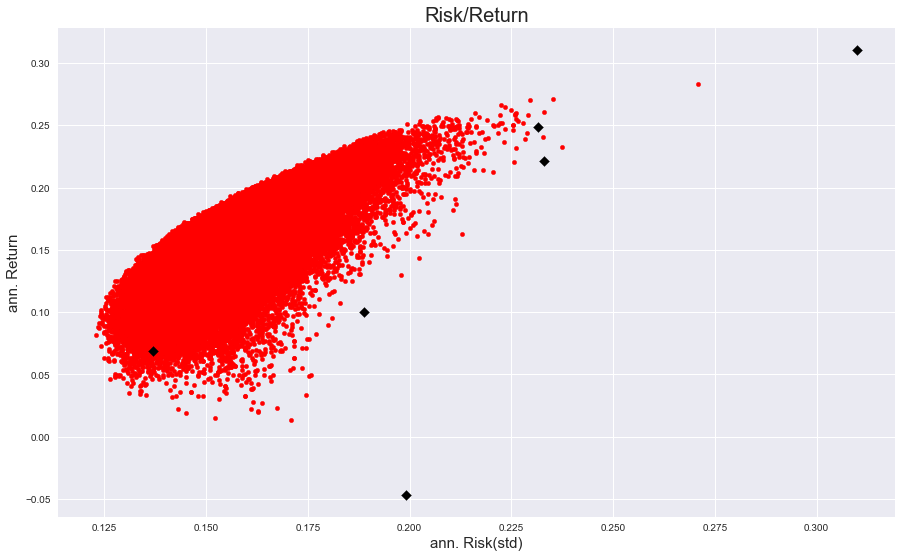

In [47]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## What is the Sharpe Ratio and a Risk Free Asset? 

\begin{equation}
    SharpeRatio = \frac{PortReturn - RFR}{PortRisk}
\end{equation}

In [48]:
risk_free_return = 0.017
risk_free_risk = 0

In [49]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

## Portfolio Analysis with the Sharpe Ratio

In [50]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2215,0.2329
DIS,0.1002,0.1887
IBM,-0.0463,0.1992
KO,0.0685,0.1369
MSFT,0.2488,0.2317


In [51]:
port_summary.head()

,Return,Risk
0,0.1486,0.1534
1,0.1914,0.1711
2,0.1060,0.1588
3,0.1310,0.1466
4,0.1948,0.1723


In [52]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [53]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2215,0.2329,0.8778
DIS,0.1002,0.1887,0.4408
IBM,-0.0463,0.1992,-0.3179
KO,0.0685,0.1369,0.3759
MSFT,0.2488,0.2317,1.0006


In [54]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [55]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1486,0.1534,0.8579
1,0.1914,0.1711,1.0191
2,0.1060,0.1588,0.5605
3,0.1310,0.1466,0.7775
4,0.1948,0.1723,1.0315


In [56]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Return  100000 non-null  float64
 1   Risk    100000 non-null  float64
 2   Sharpe  100000 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [57]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1504,0.1564,0.8466
std,0.0309,0.0125,0.1552
min,0.0133,0.1229,-0.0214
25%,0.1302,0.1475,0.7521
50%,0.1504,0.1553,0.8594
75%,0.1710,0.1639,0.9621
max,0.2831,0.2708,1.1779


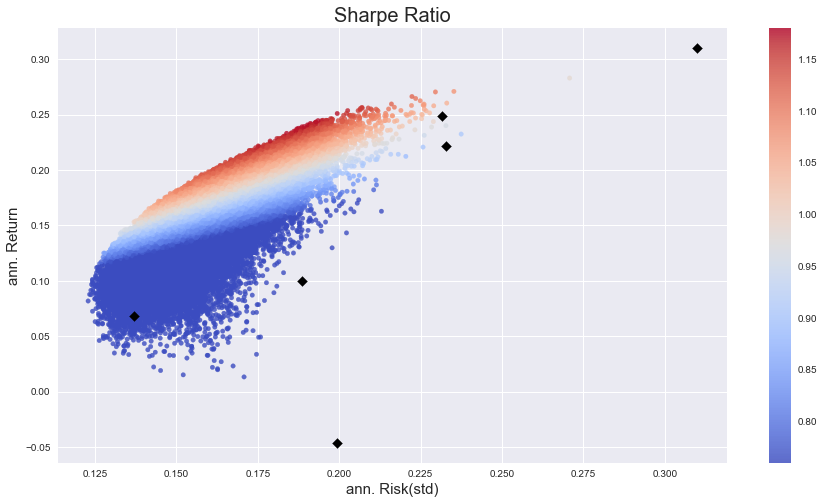

In [58]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

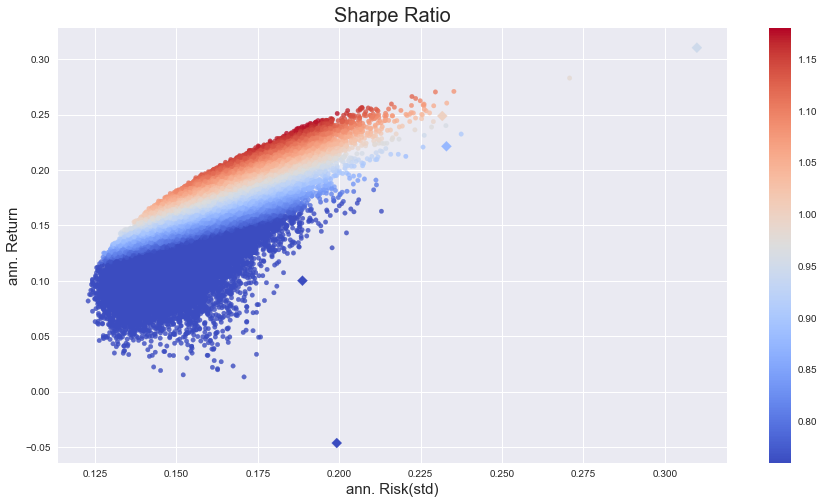

In [59]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D",
            c = summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## Finding the optimal Portfolio - The "Max Sharpe Ratio Portfolio"

In [60]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1486,0.1534,0.8579
1,0.1914,0.1711,1.0191
2,0.1060,0.1588,0.5605
3,0.1310,0.1466,0.7775
4,0.1948,0.1723,1.0315


In [61]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1504,0.1564,0.8466
std,0.0309,0.0125,0.1552
min,0.0133,0.1229,-0.0214
25%,0.1302,0.1475,0.7521
50%,0.1504,0.1553,0.8594
75%,0.1710,0.1639,0.9621
max,0.2831,0.2708,1.1779


In [62]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [63]:
msrp = port_summary.Sharpe.idxmax()
msrp

76879

In [64]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.2422
Risk     0.1912
Sharpe   1.1779
Name: 76879, dtype: float64

In [65]:
msrp_w = weights[msrp, :]
msrp_w

array([0.27682827, 0.39151246, 0.01705514, 0.00084837, 0.05666669,
       0.25708907])

In [66]:
pd.Series(index = stocks.columns, data = msrp_w)

AMZN   0.2768
BA     0.3915
DIS    0.0171
IBM    0.0008
KO     0.0567
MSFT   0.2571
dtype: float64

In [67]:
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 2.42861287e-17, 5.20417043e-18, 8.89045781e-17, 3.91640945e-01]))

In [68]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [69]:
ret["MP"] = ret.dot(opt_weights)

In [70]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067,-0.0027
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0012
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078,0.0112
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


In [71]:
summary = ann_risk_return(ret)

In [72]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [73]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2215,0.2329,0.8778
DIS,0.1002,0.1887,0.4408
IBM,-0.0463,0.1992,-0.3179
KO,0.0685,0.1369,0.3759
MSFT,0.2488,0.2317,1.0006
MP,0.2553,0.1997,1.1934


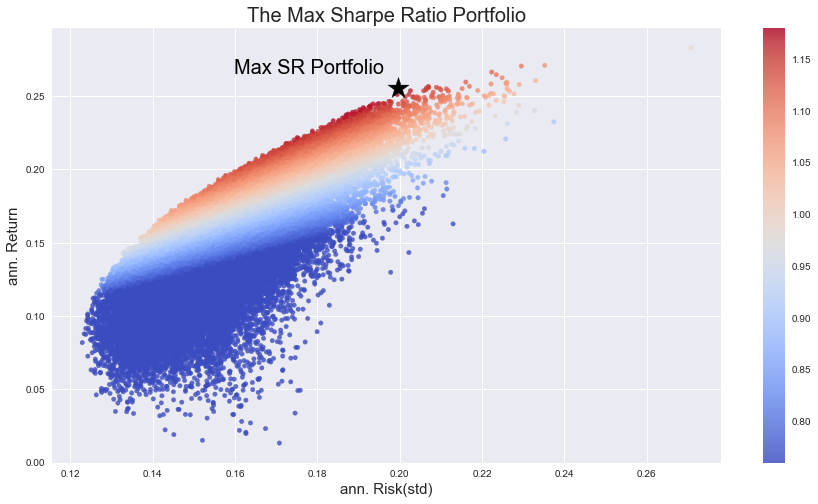

In [74]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 500, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

----------------------------------------

## The Sharpe Ratio - a graphical intuition (PP)

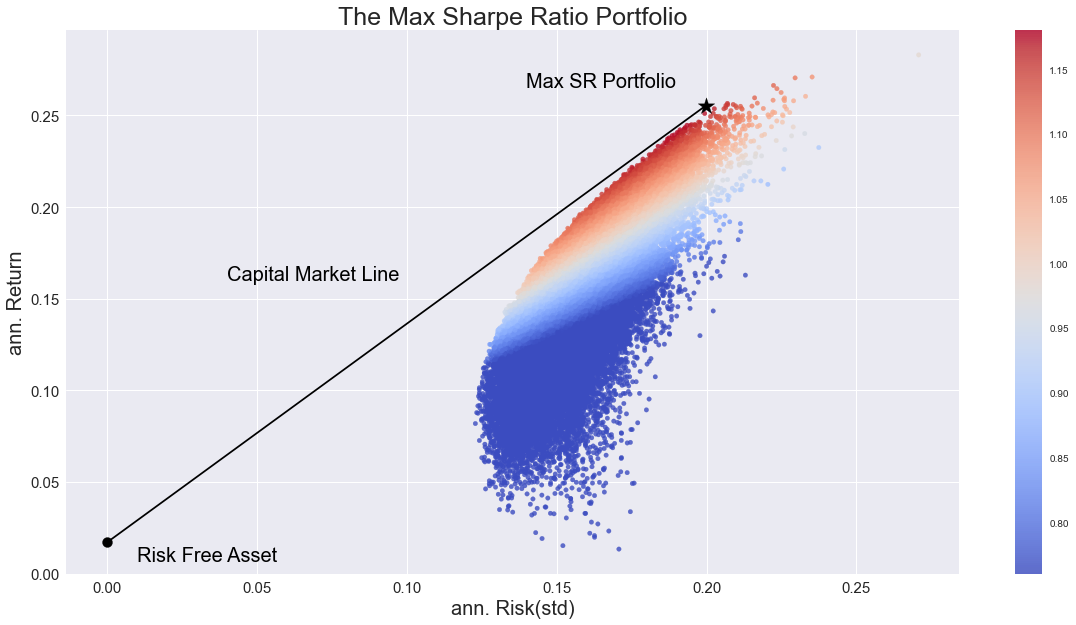

In [75]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.06, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

## Capital Market Line & Two-Fund-Theorem (PP)

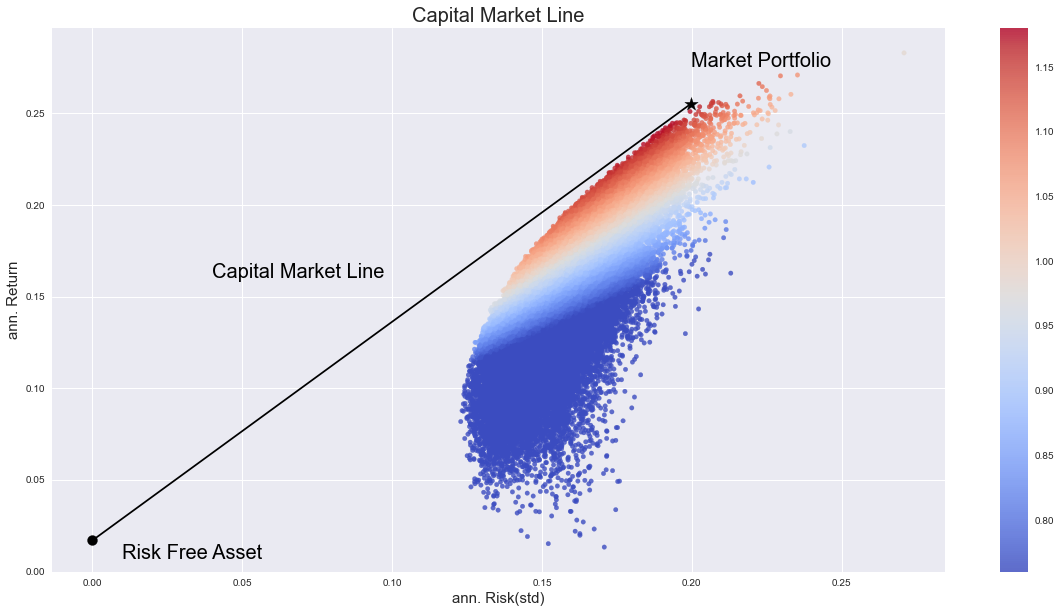

In [76]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()

--------------------------------------

## The Portfolio Diversification Effect

In [77]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2215,0.2329,0.8778
DIS,0.1002,0.1887,0.4408
IBM,-0.0463,0.1992,-0.3179
KO,0.0685,0.1369,0.3759
MSFT,0.2488,0.2317,1.0006
MP,0.2553,0.1997,1.1934


In [78]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [79]:
weighted_av = summary.loc[:"MSFT", ["Return", "Risk"]].T.dot(opt_weights)
weighted_av

Return   0.2553
Risk     0.2524
dtype: float64

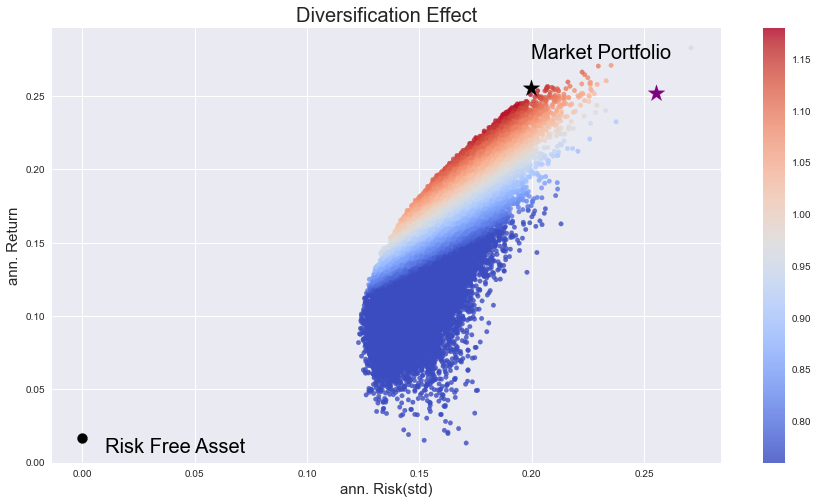

In [80]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.loc["MP", "Risk"], summary.loc["MP", "Return"]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.scatter(weighted_av.Return, weighted_av.Risk,s= 300, c = "purple", marker = "*")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Diversification Effect", fontsize = 20)
plt.show()

In [81]:
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

,A,B,C
1,0.0500,0.0500,0.1000
2,0.1000,0.0000,0.2000
3,-0.0200,0.1200,-0.0400
4,0.0400,0.0600,0.0800
5,0.0600,0.0400,0.1200
6,-0.0400,0.1400,-0.0800
7,0.0300,0.0700,0.0600
8,0.1500,-0.0500,0.3000
9,0.0600,0.0400,0.1200
10,0.0200,0.0800,0.0400


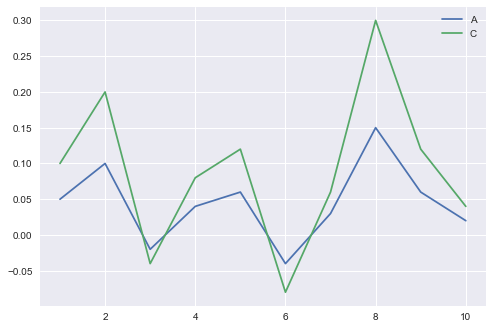

In [82]:
three_stocks.loc[:, ["A", "C"]].plot()
plt.show()

In [83]:
three_stocks.iloc[:, :3].corr()

,A,B,C
A,1.0000,-1.0000,1.0000
B,-1.0000,1.0000,-1.0000
C,1.0000,-1.0000,1.0000


In [84]:
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [85]:
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

In [86]:
three_stocks

,A,B,C,AB,AC
1,0.0500,0.0500,0.1000,0.0500,0.0750
2,0.1000,0.0000,0.2000,0.0500,0.1500
3,-0.0200,0.1200,-0.0400,0.0500,-0.0300
4,0.0400,0.0600,0.0800,0.0500,0.0600
5,0.0600,0.0400,0.1200,0.0500,0.0900
6,-0.0400,0.1400,-0.0800,0.0500,-0.0600
7,0.0300,0.0700,0.0600,0.0500,0.0450
8,0.1500,-0.0500,0.3000,0.0500,0.2250
9,0.0600,0.0400,0.1200,0.0500,0.0900
10,0.0200,0.0800,0.0400,0.0500,0.0300


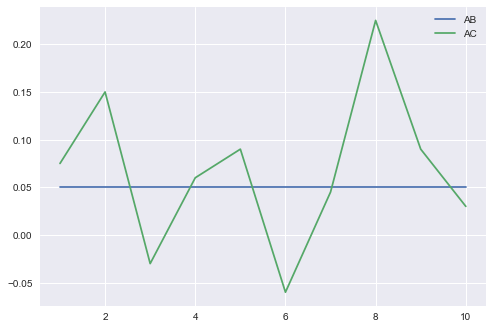

In [87]:
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

In [88]:
summ = three_stocks.agg(["mean", "std"])
summ

,A,B,C,AB,AC
mean,0.0450,0.0550,0.0900,0.0500,0.0675
std,0.0546,0.0546,0.1092,0.0000,0.0819


In [89]:
summ[["A", "B"]].mean(axis = 1)

mean   0.0500
std    0.0546
dtype: float64

In [90]:
summ[["A", "C"]].mean(axis = 1)

mean   0.0675
std    0.0819
dtype: float64

In [91]:
ret.corr()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,1.0000,0.3617,0.3412,0.3000,0.2117,0.5331,0.7922
BA,0.3617,1.0000,0.4186,0.4095,0.3136,0.4111,0.7393
DIS,0.3412,0.4186,1.0000,0.3896,0.3235,0.4049,0.4917
IBM,0.3000,0.4095,0.3896,1.0000,0.3371,0.4649,0.4987
KO,0.2117,0.3136,0.3235,0.3371,1.0000,0.3397,0.3672
MSFT,0.5331,0.4111,0.4049,0.4649,0.3397,1.0000,0.8364
MP,0.7922,0.7393,0.4917,0.4987,0.3672,0.8364,1.0000


## Systematic vs. unsystematic (diversifiable) Risk

In [92]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2215,0.2329,0.8778
DIS,0.1002,0.1887,0.4408
IBM,-0.0463,0.1992,-0.3179
KO,0.0685,0.1369,0.3759
MSFT,0.2488,0.2317,1.0006
MP,0.2553,0.1997,1.1934


In [93]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [94]:
summary

,Return,Risk,Sharpe,TotalRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960
BA,0.2215,0.2329,0.8778,0.0543
DIS,0.1002,0.1887,0.4408,0.0356
IBM,-0.0463,0.1992,-0.3179,0.0397
KO,0.0685,0.1369,0.3759,0.0188
MSFT,0.2488,0.2317,1.0006,0.0537
MP,0.2553,0.1997,1.1934,0.0399


In [95]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067,-0.0027
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0012
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078,0.0112
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


In [96]:
COV = ret.cov()*252

In [97]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,0.0960,0.0261,0.0200,0.0185,0.0090,0.0383,0.0490
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0344
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177,0.0185
IBM,0.0185,0.0190,0.0146,0.0397,0.0092,0.0215,0.0198
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108,0.0100
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537,0.0387
MP,0.0490,0.0344,0.0185,0.0198,0.0100,0.0387,0.0399


In [98]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [99]:
COV.iloc[:-1, -1].dot(opt_weights)

0.03987223494930246

In [100]:
COV.iloc[-1, -1]

0.03987223494930247

In [101]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [102]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490
BA,0.2215,0.2329,0.8778,0.0543,0.0344
DIS,0.1002,0.1887,0.4408,0.0356,0.0185
IBM,-0.0463,0.1992,-0.3179,0.0397,0.0198
KO,0.0685,0.1369,0.3759,0.0188,0.0100
MSFT,0.2488,0.2317,1.0006,0.0537,0.0387
MP,0.2553,0.1997,1.1934,0.0399,0.0399


In [103]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [104]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470
BA,0.2215,0.2329,0.8778,0.0543,0.0344,0.0199
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171
IBM,-0.0463,0.1992,-0.3179,0.0397,0.0198,0.0199
KO,0.0685,0.1369,0.3759,0.0188,0.0100,0.0087
MSFT,0.2488,0.2317,1.0006,0.0537,0.0387,0.0150
MP,0.2553,0.1997,1.1934,0.0399,0.0399,0.0000


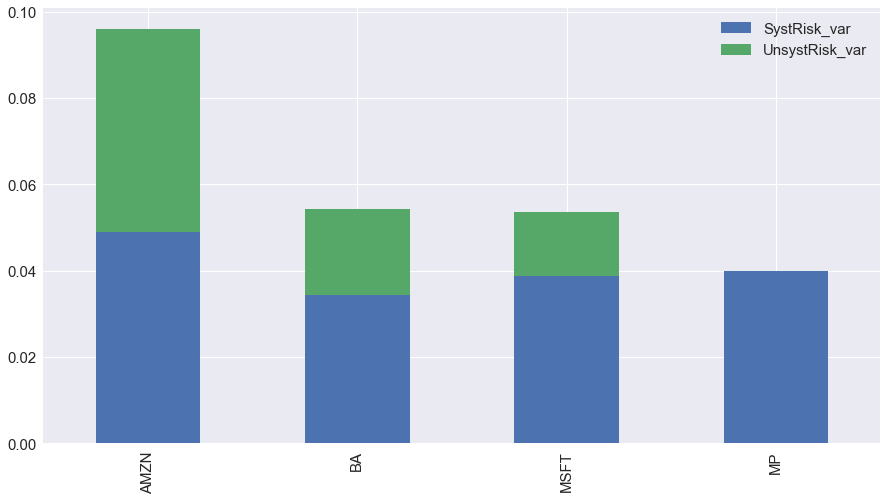

In [105]:
summary.iloc[[0, 1, 5, 6], 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

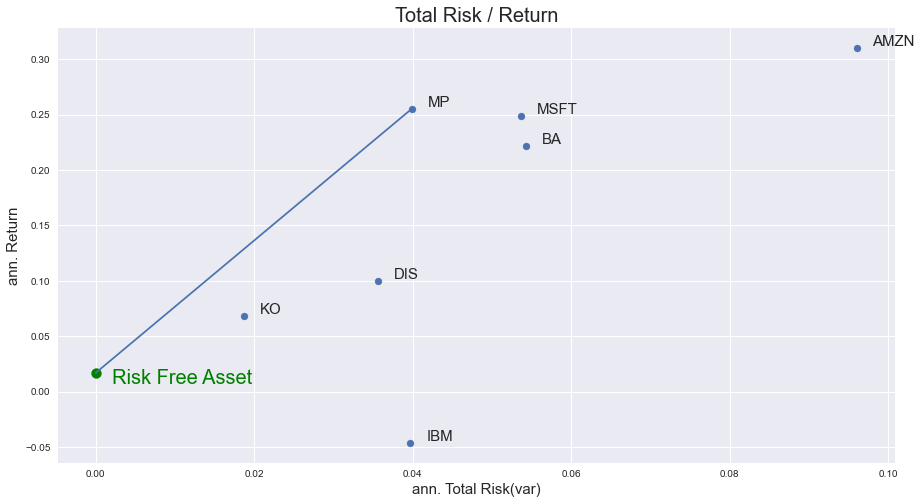

In [106]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

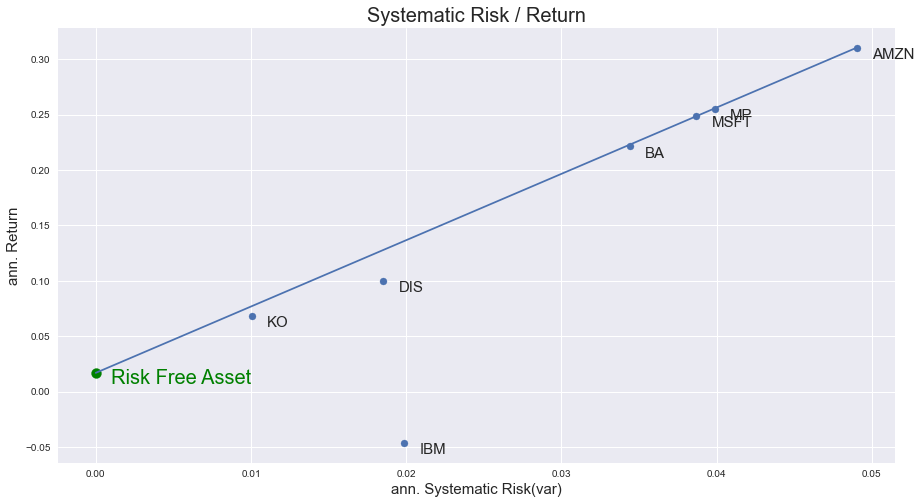

In [107]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

### CAPM & the Security Market Line

In [108]:
pd.options.display.float_format = '{:.2f}'.format

In [109]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.31,0.31,0.95,0.10,0.05,0.05
BA,0.22,0.23,0.88,0.05,0.03,0.02
DIS,0.10,0.19,0.44,0.04,0.02,0.02
IBM,-0.05,0.20,-0.32,0.04,0.02,0.02
KO,0.07,0.14,0.38,0.02,0.01,0.01
MSFT,0.25,0.23,1.00,0.05,0.04,0.01
MP,0.26,0.20,1.19,0.04,0.04,0.00


In [110]:
summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

AMZN   1.23
BA     0.86
DIS    0.46
IBM    0.50
KO     0.25
MSFT   0.97
MP     1.00
Name: SystRisk_var, dtype: float64

In [111]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [112]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46
IBM,-0.05,0.20,-0.32,0.04,0.02,0.02,0.50
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97
MP,0.26,0.20,1.19,0.04,0.04,0.00,1.00


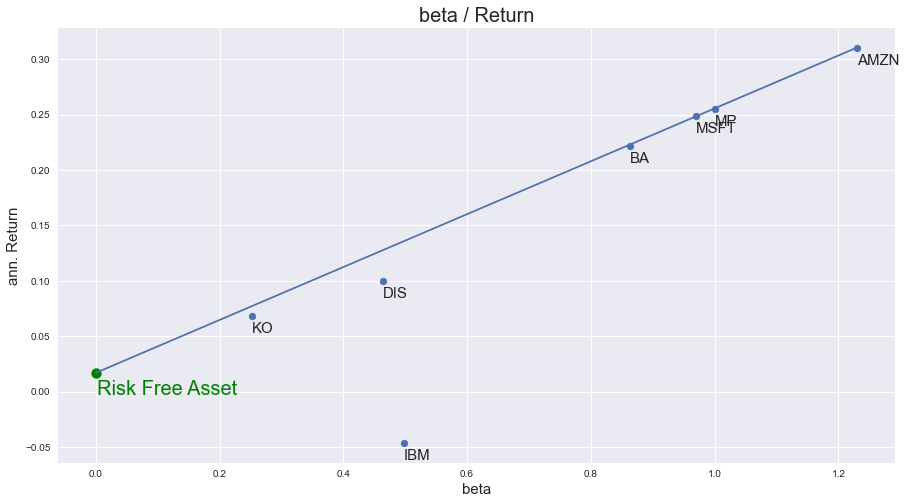

In [113]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

In [114]:
rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.loc["AMZN", "beta"]

0.30995212440126824

In [115]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [116]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.05,0.20,-0.32,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.19,0.04,0.04,0.00,1.00,0.26


## Beta and Alpha

In [117]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.05,0.20,-0.32,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.19,0.04,0.04,0.00,1.00,0.26


In [118]:
summary["alpha"] = summary.Return - summary.capm_ret

In [119]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01,-0.00
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.00


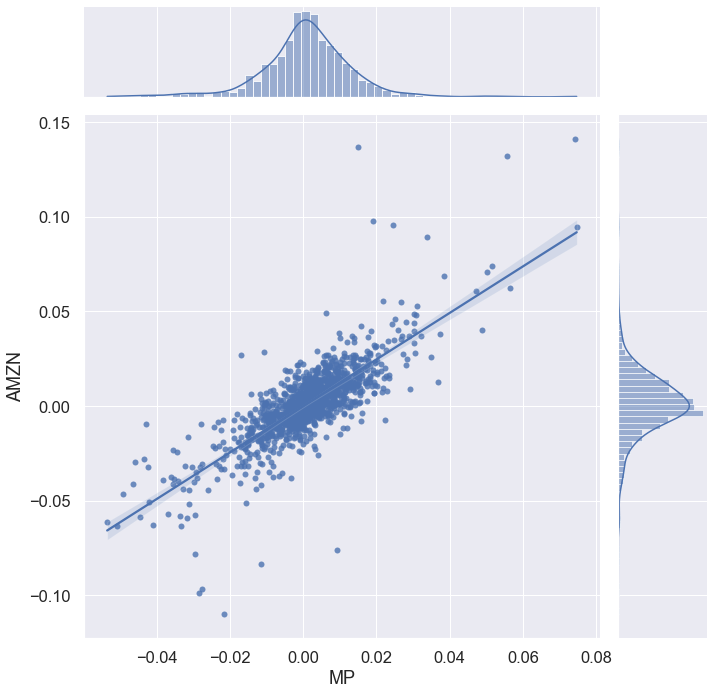

In [120]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MP", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [121]:
np.polyfit(ret.MP, ret.AMZN, 1)

array([ 1.22939655e+00, -1.34120240e-05])

In [122]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

1.2293965475597186

In [123]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31,0.00
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22,-0.00
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13,-0.03
IBM,-0.05,0.20,-0.32,0.04,0.02,0.02,0.50,0.14,-0.18
KO,0.07,0.14,0.38,0.02,0.01,0.01,0.25,0.08,-0.01
MSFT,0.25,0.23,1.00,0.05,0.04,0.01,0.97,0.25,0.00
MP,0.26,0.20,1.19,0.04,0.04,0.00,1.00,0.26,0.00


## Final Considerations (and a more real world scenario)

In [124]:
ret.drop(columns = ["MP"], inplace =True)

In [125]:
ret

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [126]:
mcap_weights = pd.read_csv("mcap_weights.csv", parse_dates = ["Date"], index_col = "Date")

In [127]:
mcap_weights

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-02,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-03,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-06,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-07,0.19,0.08,0.13,0.16,0.17,0.27
...,...,...,...,...,...,...
2018-12-21,0.32,0.08,0.09,0.05,0.10,0.36
2018-12-24,0.33,0.08,0.09,0.05,0.10,0.36
2018-12-26,0.33,0.08,0.09,0.05,0.09,0.36


In [128]:
ret["MCAP_P"] = ret.mul(mcap_weights.shift().dropna()).sum(axis = 1)

In [129]:
summary = ann_risk_return(ret)

In [130]:
summary

,Return,Risk
AMZN,0.31,0.31
BA,0.22,0.23
DIS,0.10,0.19
IBM,-0.05,0.20
KO,0.07,0.14
MSFT,0.25,0.23
MCAP_P,0.18,0.17


In [131]:
COV = ret.cov()*252

In [132]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.10,0.03,0.02,0.02,0.01,0.04,0.04
BA,0.03,0.05,0.02,0.02,0.01,0.02,0.02
DIS,0.02,0.02,0.04,0.01,0.01,0.02,0.02
IBM,0.02,0.02,0.01,0.04,0.01,0.02,0.02
KO,0.01,0.01,0.01,0.01,0.02,0.01,0.01
MSFT,0.04,0.02,0.02,0.02,0.01,0.05,0.03
MCAP_P,0.04,0.02,0.02,0.02,0.01,0.03,0.03


In [133]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [134]:
summary["beta"] = summary.SystRisk_var / summary.loc["MCAP_P", "SystRisk_var"]

In [135]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.05,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.03,1.15
MCAP_P,0.18,0.17,0.03,1.00


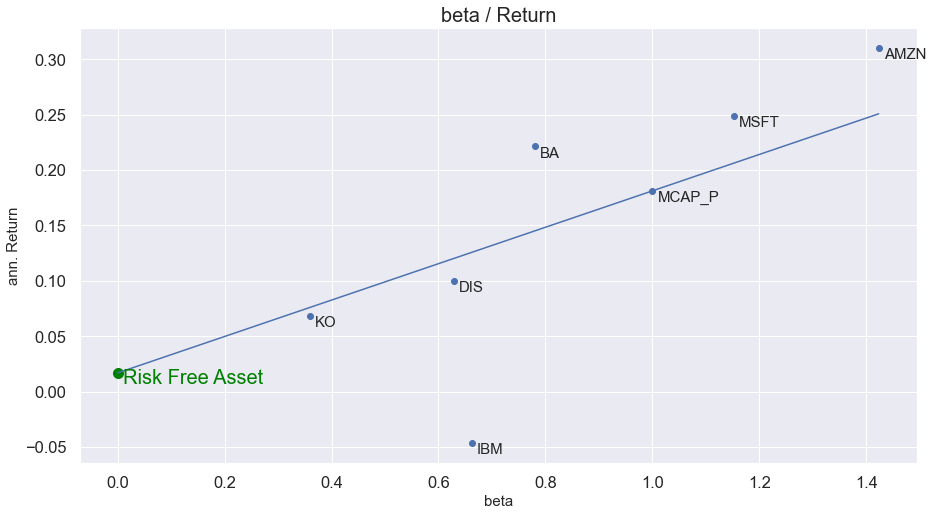

In [136]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.01, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0],rf[0] + summary.loc["AMZN", "beta"]*(summary.loc["MCAP_P", "Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

## Another Intuition on Beta: Cyclical vs. non-Cyclical Stocks

In [137]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01


In [138]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.05,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.03,1.15
MCAP_P,0.18,0.17,0.03,1.00


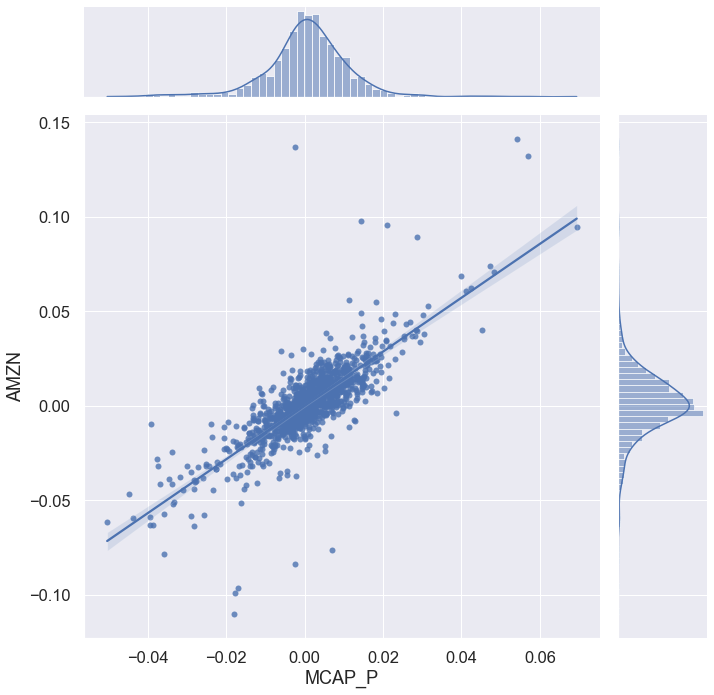

In [139]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [140]:
np.polyfit(ret.MCAP_P, ret.AMZN, 1)

array([1.42335885e+00, 2.08353343e-04])

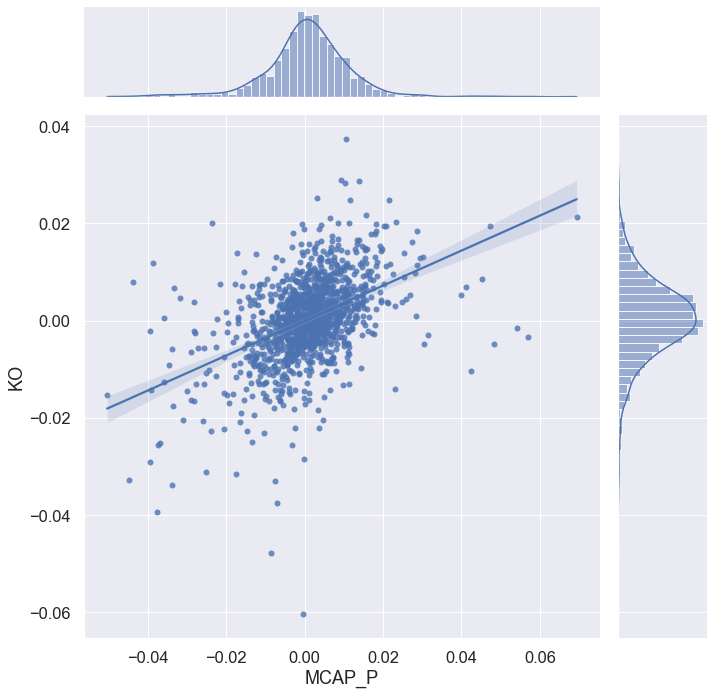

In [141]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "KO", height = 10, kind = "reg")
plt.show()

In [142]:
stocks = yf.download(["AMZN", "KO"], "2007-12-31", "2018-12-31").Close

[*********************100%***********************]  2 of 2 completed


In [143]:
stocks

,AMZN,KO
Date,,
2007-12-31,4.63,30.68
2008-01-02,4.81,30.55
2008-01-03,4.76,30.86
2008-01-04,4.44,30.92
2008-01-07,4.44,31.66
...,...,...
2018-12-21,68.87,47.57
2018-12-24,67.20,45.96
2018-12-26,73.54,46.94


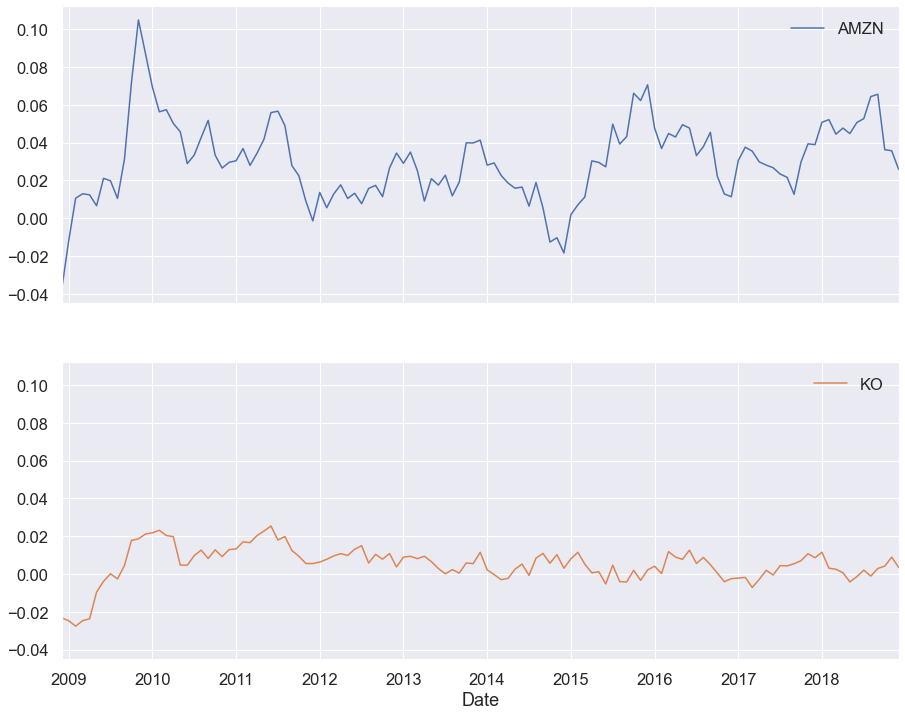

In [144]:
stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)
plt.show()

In [145]:
pd.options.display.float_format = '{:.4f}'.format

## Forward-looking Portfolios - 2-Asset Case (Mean-Variance Optimization)

In [146]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067,-0.0068
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0022
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0086
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078,0.0100
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081


In [147]:
two_assets = ret.iloc[:, :2]
two_assets.head()

,AMZN,BA
Date,,
2014-01-02,-0.0021,0.0013
2014-01-03,-0.0038,0.0070
2014-01-06,-0.0071,0.0057
2014-01-07,0.0112,0.0152
2014-01-08,0.0098,0.0022


In [148]:
summ_two = ann_risk_return(two_assets)
summ_two

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2215,0.2329


In [149]:
w_AMZN = 0.6
w_BA = 0.4
ws = np.array([w_AMZN, w_BA])
ws

array([0.6, 0.4])

### Calculating Expected Portfolio Return

In [150]:
ERet_AMZN = 0.20
ERet_BA = 0.15
ERets = pd.Series({"AMZN": ERet_AMZN, "BA": ERet_BA})
ERets

AMZN   0.2000
BA     0.1500
dtype: float64

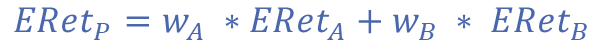

In [151]:
ERet_P = w_AMZN * ERet_AMZN + w_BA * ERet_BA
ERet_P

0.18

In [152]:
ERets.dot(ws)

0.18

### Calculating Expected Portfolio Risk

In [153]:
cov_matrix = two_assets.cov() * 252
cov_matrix

,AMZN,BA
AMZN,0.0960,0.0261
BA,0.0261,0.0543


In [154]:
VAR_AMZN = cov_matrix.iloc[0,0]
VAR_AMZN

0.0960144811008648

In [155]:
VAR_BA = cov_matrix.iloc[1,1]
VAR_BA

0.05425950524853497

In [156]:
cov_AMZN_BA = cov_matrix.iloc[1,0]
cov_AMZN_BA

0.02610557806082643

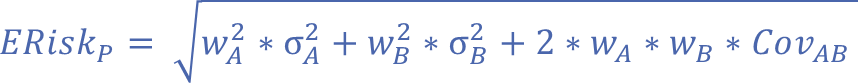

In [157]:
ERisk_P = np.sqrt(w_AMZN**2 * VAR_AMZN + w_BA**2 * VAR_BA + 2 * w_AMZN * w_BA * cov_AMZN_BA)
ERisk_P

0.2361724190189735

In [158]:
np.sqrt(cov_matrix.dot(ws).dot(ws))

0.23617241901897354

### Many Random Portfolios

In [159]:
np.random.seed(123)
matrix = np.random.random(10000 * 2).reshape(10000, 2)

In [160]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [161]:
weights

array([[0.7087962 , 0.2912038 ],
       [0.29152056, 0.70847944],
       [0.62969057, 0.37030943],
       ...,
       [0.52028043, 0.47971957],
       [0.22215611, 0.77784389],
       [0.49742945, 0.50257055]])

In [162]:
Return = ERets.dot(weights.T)
Return

array([0.18543981, 0.16457603, 0.18148453, ..., 0.17601402, 0.16110781,
       0.17487147])

In [163]:
Risk = np.sqrt((cov_matrix.dot(weights.T).T * weights).sum(axis = 1))
Risk

0      0.2522
1      0.2149
2      0.2402
3      0.2347
4      0.2302
        ...  
9995   0.2642
9996   0.2188
9997   0.2270
9998   0.2158
9999   0.2248
Length: 10000, dtype: float64

In [164]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk})
summ

,Return,Risk
0,0.1854,0.2522
1,0.1646,0.2149
2,0.1815,0.2402
3,0.1794,0.2347
4,0.1775,0.2302
...,...,...
9995,0.1889,0.2642
9996,0.1710,0.2188
9997,0.1760,0.2270
9998,0.1611,0.2158


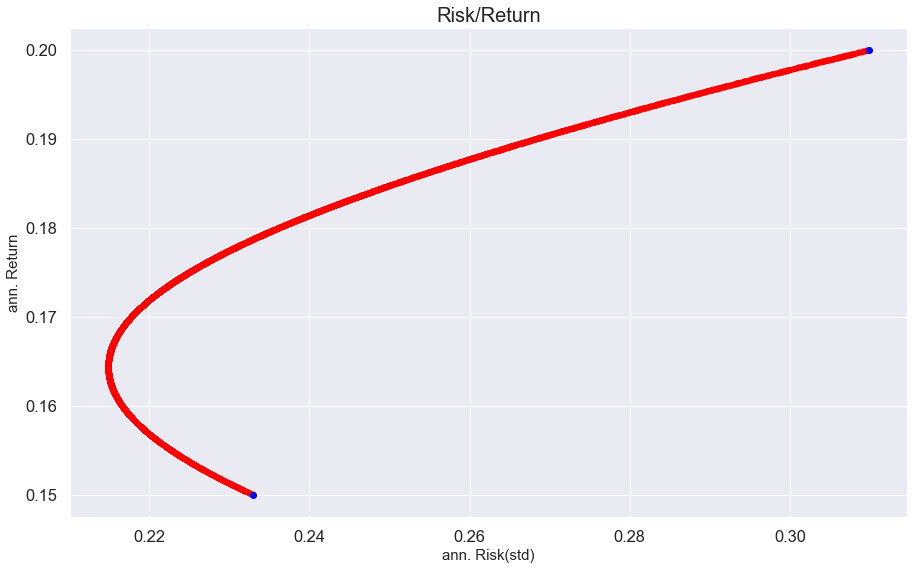

In [165]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.scatter(summ_two.Risk, ERets, color = "blue")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Portfolios - not that simple

In [166]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0109,-0.0157,-0.0067,-0.0068
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0022
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0086
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0078,0.0100
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081


In [167]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.0960,0.0261,0.0200,0.0185,0.0090,0.0383,0.0432
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0237
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177,0.0191
IBM,0.0185,0.0190,0.0146,0.0397,0.0092,0.0215,0.0201
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108,0.0109
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537,0.0350
MCAP_P,0.0432,0.0237,0.0191,0.0201,0.0109,0.0350,0.0304


In [168]:
COV_C = COV.iloc[:-1, :-1]
COV_C

,AMZN,BA,DIS,IBM,KO,MSFT
AMZN,0.0960,0.0261,0.0200,0.0185,0.0090,0.0383
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177
IBM,0.0185,0.0190,0.0146,0.0397,0.0092,0.0215
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537


In [169]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4234
BA,0.2215,0.2329,0.0237,0.7797
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0463,0.1992,0.0201,0.6621
KO,0.0685,0.1369,0.0109,0.3595
MSFT,0.2488,0.2317,0.0350,1.1523
MCAP_P,0.1812,0.1742,0.0304,1.0000


In [170]:
summary_C = summary.iloc[:-1, :].copy()

In [171]:
summary_C

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4234
BA,0.2215,0.2329,0.0237,0.7797
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0463,0.1992,0.0201,0.6621
KO,0.0685,0.1369,0.0109,0.3595
MSFT,0.2488,0.2317,0.0350,1.1523


In [172]:
summary_C["ER1"] = [0.25, 0.15, 0.08, 0.08, 0.10, 0.15] 

In [173]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3105,0.3099,0.0432,1.4234,0.2500
BA,0.2215,0.2329,0.0237,0.7797,0.1500
DIS,0.1002,0.1887,0.0191,0.6282,0.0800
IBM,-0.0463,0.1992,0.0201,0.6621,0.0800
KO,0.0685,0.1369,0.0109,0.3595,0.1000
MSFT,0.2488,0.2317,0.0350,1.1523,0.1500


In [174]:
noa = len(summary_C.index)
noa

6

In [175]:
nop = 1000000
nop

1000000

In [176]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [177]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.62483862, 0.59134382, 0.36809244, 0.68256896, 0.95087943,
        0.8901324 ],
       [0.77031552, 0.77814261, 0.14151563, 0.32447434, 0.62107081,
        0.66743122],
       [0.02079644, 0.80470884, 0.02576405, 0.20198792, 0.83794608,
        0.63565318]])

In [178]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [179]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.15210822, 0.14395438, 0.08960696, 0.16616186, 0.2314783 ,
        0.21669028],
       [0.23322045, 0.23559018, 0.04284522, 0.09823773, 0.18803518,
        0.20207124],
       [0.00823016, 0.31846242, 0.01019609, 0.07993644, 0.33161601,
        0.25155887]])

In [180]:
Return = summary_C.ER1.dot(weights.T)
Return

array([0.14283649, 0.15548457, 0.12751762, ..., 0.13573309, 0.15404448,
       0.12793294])

In [181]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))
Risk

0        0.1534
1        0.1711
2        0.1588
3        0.1466
4        0.1723
          ...  
999995   0.1531
999996   0.1665
999997   0.1492
999998   0.1639
999999   0.1472
Length: 1000000, dtype: float64

In [182]:
Risk.shape

(1000000,)

In [183]:
Return.shape

(1000000,)

In [184]:
rf = 0.02

In [185]:
Sharpe = (Return - rf) / Risk

In [186]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ

,Return,Risk,Sharpe
0,0.1428,0.1534,0.8010
1,0.1555,0.1711,0.7917
2,0.1275,0.1588,0.6770
3,0.1276,0.1466,0.7339
4,0.1563,0.1723,0.7912
...,...,...,...
999995,0.1205,0.1531,0.6563
999996,0.1440,0.1665,0.7450
999997,0.1357,0.1492,0.7755
999998,0.1540,0.1639,0.8177


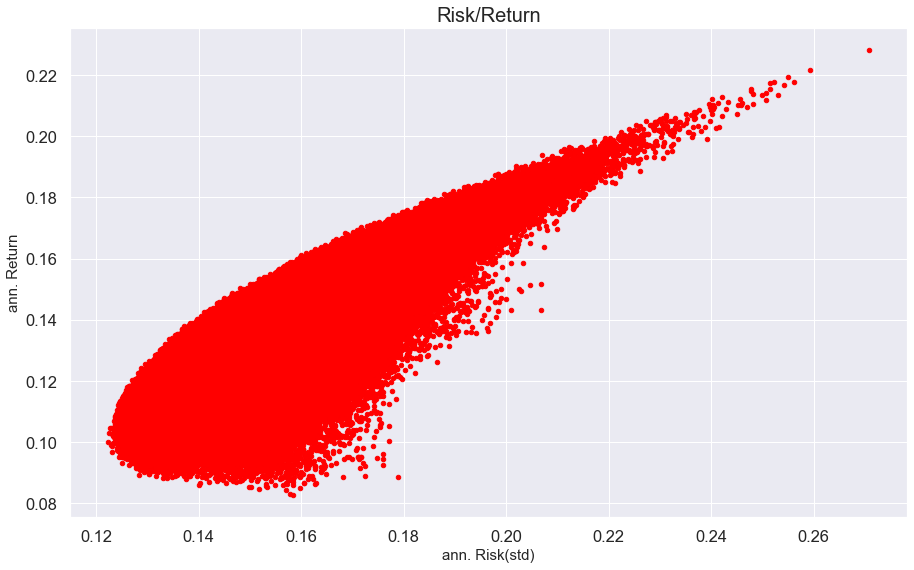

In [187]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [188]:
summ.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1565,0.7332
std,0.0151,0.0126,0.0594
min,0.0828,0.1223,0.3830
25%,0.1243,0.1476,0.6967
50%,0.1350,0.1554,0.7413
75%,0.1451,0.1641,0.7762
max,0.2283,0.2708,0.8834


In [189]:
summ.Sharpe.idxmax()

873915

In [190]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8834
Name: 873915, dtype: float64

In [191]:
weights[summ.Sharpe.idxmax()]

array([3.45964754e-01, 1.77094106e-01, 8.56191979e-05, 8.51874520e-03,
       4.54615917e-01, 1.37208588e-02])

In [192]:
PF1 = pd.Series(index = summary_C.index, data = weights[summ.Sharpe.idxmax()])
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64

### Changing Expected Returns

In [193]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3105,0.3099,0.0432,1.4234,0.2500
BA,0.2215,0.2329,0.0237,0.7797,0.1500
DIS,0.1002,0.1887,0.0191,0.6282,0.0800
IBM,-0.0463,0.1992,0.0201,0.6621,0.0800
KO,0.0685,0.1369,0.0109,0.3595,0.1000
MSFT,0.2488,0.2317,0.0350,1.1523,0.1500


In [194]:
summary_C["ER2"] = [0.22, 0.18, 0.11, 0.11, 0.07, 0.12]
summary_C

,Return,Risk,SystRisk_var,beta,ER1,ER2
AMZN,0.3105,0.3099,0.0432,1.4234,0.2500,0.2200
BA,0.2215,0.2329,0.0237,0.7797,0.1500,0.1800
DIS,0.1002,0.1887,0.0191,0.6282,0.0800,0.1100
IBM,-0.0463,0.1992,0.0201,0.6621,0.0800,0.1100
KO,0.0685,0.1369,0.0109,0.3595,0.1000,0.0700
MSFT,0.2488,0.2317,0.0350,1.1523,0.1500,0.1200


In [195]:
Return = summary_C.ER2.dot(weights.T)
Return

array([0.1348312 , 0.15137105, 0.133529  , ..., 0.12971648, 0.14664487,
       0.12244864])

In [196]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))

In [197]:
Sharpe = (Return - rf) / Risk

In [198]:
summ2 = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ2

,Return,Risk,Sharpe
0,0.1348,0.1534,0.7488
1,0.1514,0.1711,0.7677
2,0.1335,0.1588,0.7149
3,0.1288,0.1466,0.7417
4,0.1477,0.1723,0.7413
...,...,...,...
999995,0.1226,0.1531,0.6702
999996,0.1533,0.1665,0.8006
999997,0.1297,0.1492,0.7352
999998,0.1466,0.1639,0.7726


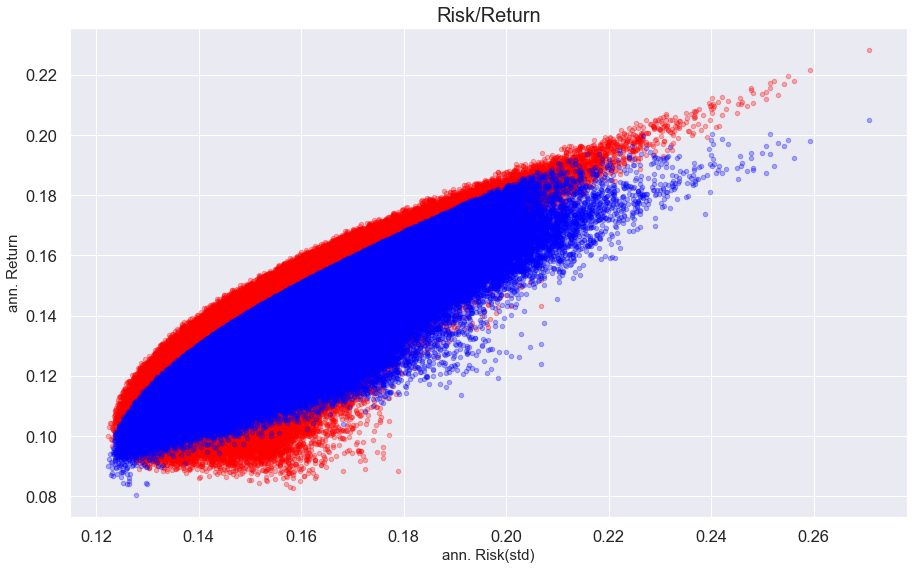

In [199]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red", alpha = 0.3)
plt.scatter(summ2.Risk, summ2.Return,s= 20, color = "blue", alpha = 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [200]:
summ2.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1565,0.7338
std,0.0127,0.0126,0.0434
min,0.0806,0.1223,0.4739
25%,0.1264,0.1476,0.7080
50%,0.1350,0.1554,0.7387
75%,0.1434,0.1641,0.7656
max,0.2048,0.2708,0.8237


In [201]:
summ2.Sharpe.idxmax()

812452

In [202]:
summ2.iloc[summ2.Sharpe.idxmax(), :]

Return   0.1683
Risk     0.1800
Sharpe   0.8237
Name: 812452, dtype: float64

In [203]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8834
Name: 873915, dtype: float64

In [204]:
weights[summ2.Sharpe.idxmax()]

array([0.29233733, 0.42676296, 0.10988534, 0.07280503, 0.09442998,
       0.00377936])

In [205]:
PF2 = pd.Series(index = summary_C.index, data = weights[summ2.Sharpe.idxmax()])
PF2

AMZN   0.2923
BA     0.4268
DIS    0.1099
IBM    0.0728
KO     0.0944
MSFT   0.0038
dtype: float64

In [206]:
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64